In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


[1. Load libraries and read the data](http://)
* > [1.1. Load libraries](http://)
* > [1.2. Read the data](http://)

[2. Overview](http://)
* > [2.1. Head](http://)
* > [2.2. Dependent variable](http://)
* > [2.3. Missing Data](http://)

[3. Replacing missing data, Outlier treatment and EDA](http://)
* > [3.1. Insulin](http://)
* > [3.2. SkinThickness ](http://)
* > [3.3. BloodPressure ](http://)
* > [3.4. BMI ](http://)
* > [3.5. Glucose ](http://)
* > [3.6. Age ](http://)
* > [3.7. Pregnancies ](http://)
* > [3.8. DPF ](http://)

[4. Modelling](http://)
* > [4.1. Splitting data into train and test set](http://)
* > [4.2. Base models ](http://)
> * > 4.2.1. Decision Tree Classifier
> * > 4.2.2. AdaBoost Classifier
> * > 4.2.3. XGBoost Classifier
> * > 4.2.4. LightGBM Classifier
> * > 4.2.5. Random Forest Classifier
> * > 4.2.6. k-NN Classifier
> * > 4.2.1. Logistic Regression
* > [4.3. Evaluation Metrics ](http://)
> * > 4.3.1. Confusion matrix
> * > 4.3.2. ROC-AUC curve
> * > 4.3.3. Accuracy
* > [4.4. Hyperparamter tuning ](http://)
> * > 4.4.1. XGBoost Classifier
> * > 4.4.2. LightGBM Classifier
> * > 4.4.3. Random Forest Classifer

[5. Final Prediction](http://)


## Who are Pima Indians ?

"The Pima (or Akimel O'odham, also spelled Akimel O'otham, "River People", formerly known as Pima) are a group of Native Americans living in an area consisting of what is now central and southern Arizona. The majority population of the surviving two bands of the Akimel O'odham are based in two reservations: the Keli Akimel O'otham on the Gila River Indian Community (GRIC) and the On'k Akimel O'odham on the Salt River Pima-Maricopa Indian Community (SRPMIC)." Wikipedia

# [1. Load libraries and read the data](http://)
##  [1.1. Load libraries](http://)

In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data processing, evaluation metrics and modelling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_curve, auc
import sklearn.metrics as sklm
import lightgbm as lgbm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Stats
import numpy.random as nr
import scipy.stats as ss
from scipy.stats import randint 

# Ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

## [1.2. Read the data](http://)

In [3]:
path = "../input/pima-indians-diabetes-database/diabetes.csv"
data = pd.read_csv(path)

# [2. Overview](http://)
##  [2.1. Head](http://)

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)

*For simplicity, I have renamed DiabetesPedigreeFunction as DPF.*

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


*The data looks fine, but there's a catch. Some of the features like Glucose and BMI contain 0's which makes no sense, so they might me missing values which have been imputed as zeros to make the data look more clean.*


## What is Diabetes ?

Acccording to NIH, "**Diabetes** 
is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from the food get into your cells to be used for energy. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well. Glucose then stays in your blood and doesn’t reach your cells.

Over time, having too much glucose in your blood can cause health problems. Although diabetes has no cure, you can take steps to manage your diabetes and stay healthy.

Sometimes people call diabetes “a touch of sugar” or “borderline diabetes.” These terms suggest that someone doesn’t really have diabetes or has a less serious case, but every case of diabetes is serious.

**What are the different types of diabetes?**
The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes**
If you have type 1 diabetes, your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Type 1 diabetes is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes**
If you have type 2 diabetes, your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes**
Gestational diabetes develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

**Other types of diabetes** 
Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

##  [2.2. Dependent variable](http://)

In [8]:
data['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

*When looked upon the dependent variable, we found that this is a case of imbalanced class distribution as healthy cases are almost twice the diabetic ones and we will treat it later in the modelling section.*

##  [2.3. Missing Data](http://)

**In this section, I have made two datasets(Diabetic and Healthy) to visualize the target count and target percentage with the help of histogram and pie chart.**

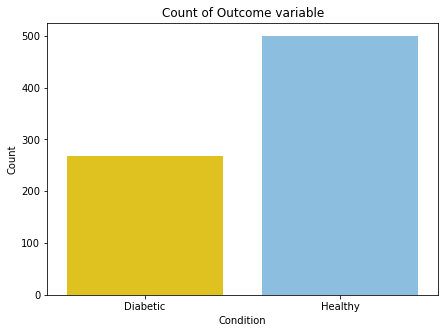

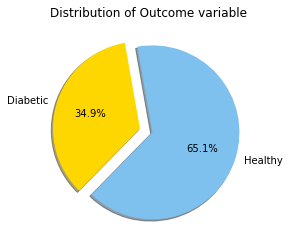

In [10]:
# Creating two datasets
Diabetic = data.loc[(data['Outcome'] != 0)]
Healthy = data.loc[(data['Outcome'] == 0)]
colors = ['#FFD700', '#7EC0EE']

# Creating a dataframe having label_count
label_count = pd.DataFrame({'Condition': ['Diabetic', 'Healthy'], 'Count': [len(Diabetic.index), len(Healthy.index)]})

# Visualizing this dataframe
plt.figure(figsize=(7,5))
sns.barplot(x=label_count['Condition'], y=label_count['Count'], data=label_count, palette=colors)
plt.title("Count of Outcome variable")


# Pie chart for label_count distribution as in percentage
labels = ['Diabetic', 'Healthy']
sizes = [len(Diabetic.index), len(Healthy.index)]
explode = (0.1, 0.05)

fig,ax = plt.subplots()
plt.title('Distribution of Outcome variable')
ax.pie(sizes,
       explode = explode,
       labels = labels,
       autopct = '%1.1f%%',
       shadow = True,
       startangle = 100,
       colors = colors)

plt.show()

In [11]:
# Replacing all zeros in the following features with NaN(Not a Number), so that we can later replace with something more useful
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [12]:
# Checking the missing values in each feature
data.isnull().sum()

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64

**Making a seperate dataframe for features containing missing values and the percentage they account out of all observations.**

In [13]:
missing_data = pd.DataFrame({'Columns': ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'],
                             'Missing_values': [data['Glucose'].isnull().sum(), data['BloodPressure'].isnull().sum(),
                                                data['SkinThickness'].isnull().sum(), data['Insulin'].isnull().sum(),
                                                data['BMI'].isnull().sum()],
                             'Percentage': [data['Glucose'].isnull().sum()/len(data['Glucose'])*100,
                                            data['BloodPressure'].isnull().sum()/len(data['BloodPressure'])*100,
                                            data['SkinThickness'].isnull().sum()/len(data['SkinThickness'])*100,
                                            data['Insulin'].isnull().sum()/len(data['Insulin'])*100,
                                            data['BMI'].isnull().sum()/len(data['BMI'])*100]})
missing_data.head()

,Columns,Missing_values,Percentage
0,Glucose,5,0.651042
1,BloodPressure,35,4.557292
2,SkinThickness,227,29.557292
3,Insulin,374,48.697917
4,BMI,11,1.432292


**Visualizing Outliers and quartiles.**

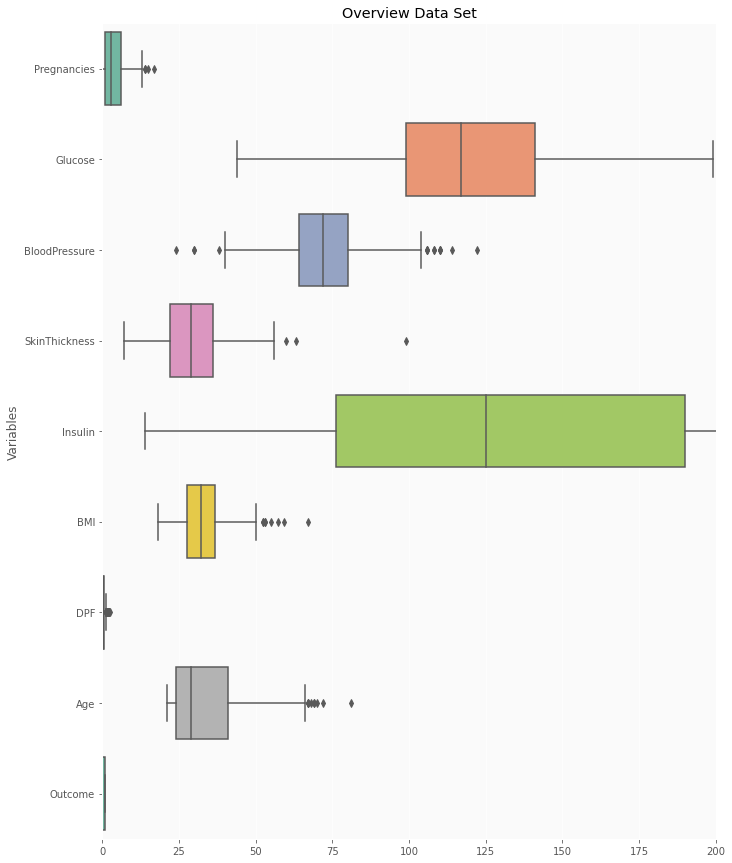

In [14]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = data, 
  orient = 'h', 
  palette = 'Set2')

*Now, you must be wondering what outliers and quartiles are?*

*Outliers are those predictions which shows extreme behaviour e.g. they either lie below the min value, above the max value or both, a particular feature possess. It is very important to treat these outliers as these can lead to overfitting the model(or learning too much on training set and not generalising well on test set).*

*A feature is divided into 4 parts or quartiles. In the above box plot, there are some cutoffs. These cut points are lower quartile (or first quartile), median (or second quartile) and upper quartile (or third quartile). Second quartile is the median of the feature. First quartile is the median of the data lower than second quartile. Third quartile is the median of the data grater than the second quartile. Interquartile range (IQR) is calculated by subtracting lower quartile from upper quartile. Outliers can be determined using IQR and lower and upper quartiles.*

**Correlation matrix or Heatmap.**

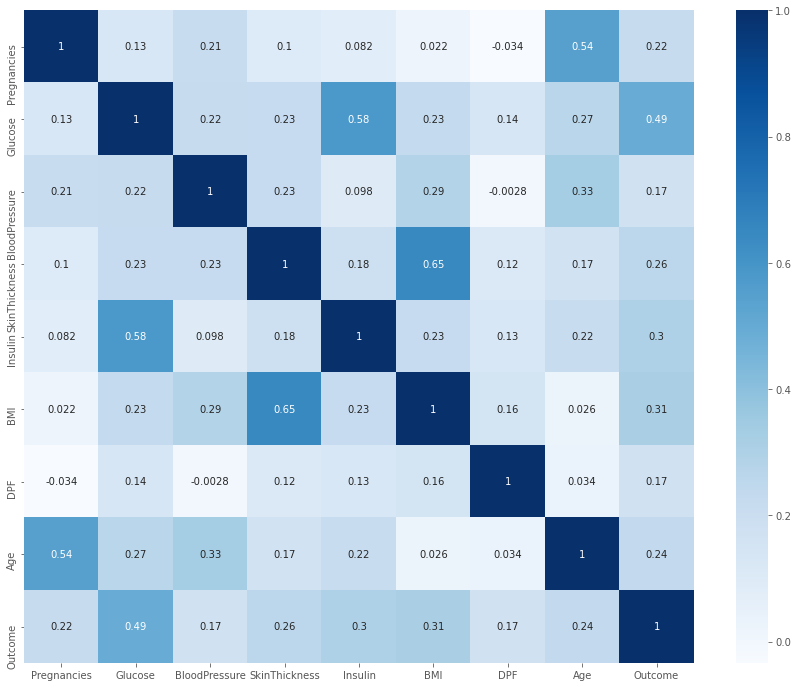

In [15]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(), cmap = 'Blues', annot = True)
plt.show()

*This plot tells us about how much a specific feature is correlated with another feature. This can be useful in Feature Selection of most important features while wotking with thousands of features.*

# [3. Replace missing data, Outlier treatment and EDA](http://)

In [16]:
# Function to replace nan values with the median of observations in those features
def fill_with_median(x):
    data[x].fillna(data[x].astype('float').median(axis=0))

In [17]:
# Function to treat outliers
def z_score(col, data):
    median = data[col].median()
    std = data[col].std()
    threshold = std * 3
    lower, upper = median - threshold, median + threshold
    new_df = data[(data[col] < upper) & (data[col] > lower)]
    return new_df

*Z_score is a popular method for treating outliers where we discard observations having a z_score > 3.*

*For a normal distribution, it is estimated that*
* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation

*z_score = (x - median)/std. deviation.*

*Here, I have taken median instead of mean, because the mean has one main disadvantage: it is particularly susceptible to the influence of outliers, which is why it is wise to use median when you have features which are slightly skewed(or not normally distributed).*

## [3.1. Insulin](http://)

* Insulin : 2-Hour serum insulin (mu U/ml)

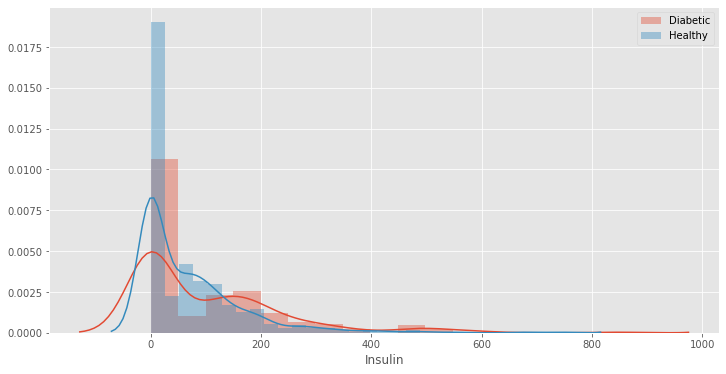

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['Insulin'], hist=True, label='Diabetic')
sns.distplot(Healthy['Insulin'], hist=True, label='Healthy')
plt.legend()

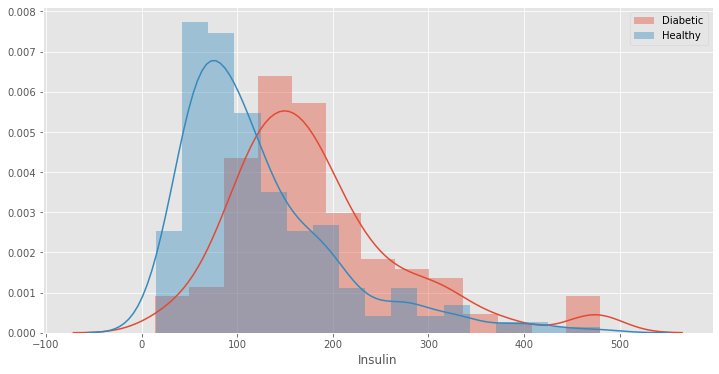

In [19]:
Insulin = z_score('Insulin', data)

Diabetic_ins = Insulin.loc[(Insulin['Outcome'] != 0)]
Healthy_ins = Insulin.loc[(Insulin['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_ins['Insulin'], hist=True, label='Diabetic')
sns.distplot(Healthy_ins['Insulin'], hist=True, label='Healthy')
plt.legend()

*Here, I have made another dataset: Insulin which contains outlier-free observations in order to compare both the plots.*

In [20]:
fill_with_median('Insulin')

In [21]:
data.loc[(data['Outcome'] != 0) & (data['Insulin'].isnull()), 'Insulin'] = 166.0 # Median(Diabetic)
data.loc[(data['Outcome'] == 0) & (data['Insulin'].isnull()), 'Insulin'] = 100.0 # Median(Healthy)

## [3.2. SkinThickness](http://)

* SkinThickness : Triceps skin fold thickness (mm)

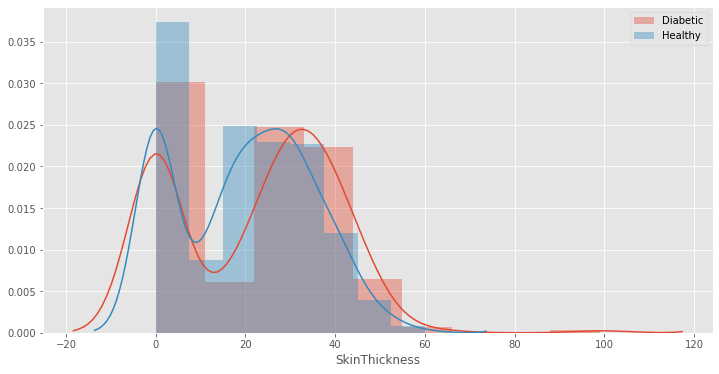

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['SkinThickness'], hist=True, label='Diabetic')
sns.distplot(Healthy['SkinThickness'], hist=True, label='Healthy')
plt.legend()

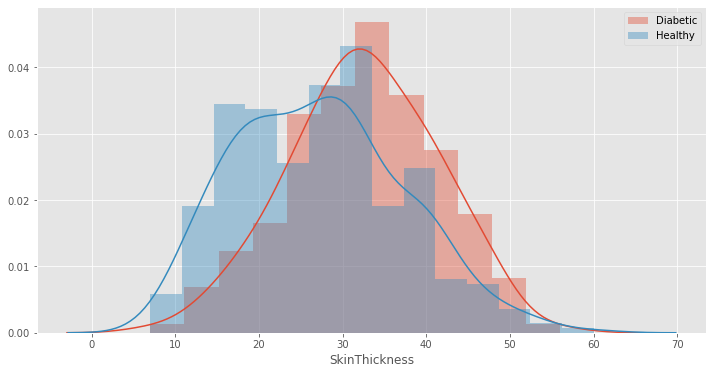

In [23]:
SkinThickness = z_score('SkinThickness', data)

Diabetic_skin = SkinThickness.loc[(SkinThickness['Outcome'] != 0)]
Healthy_skin = SkinThickness.loc[(SkinThickness['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_skin['SkinThickness'], hist=True, label='Diabetic')
sns.distplot(Healthy_skin['SkinThickness'], hist=True, label='Healthy')
plt.legend()

In [24]:
fill_with_median('SkinThickness')

In [25]:
data.loc[(data['Outcome'] != 0) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 32.0 
data.loc[(data['Outcome'] == 0) & (data['SkinThickness'].isnull()), 'SkinThickness'] = 27.0

## [3.3. BloodPressure](http://)

* BloodPressure : Diastolic blood pressure (mm Hg)

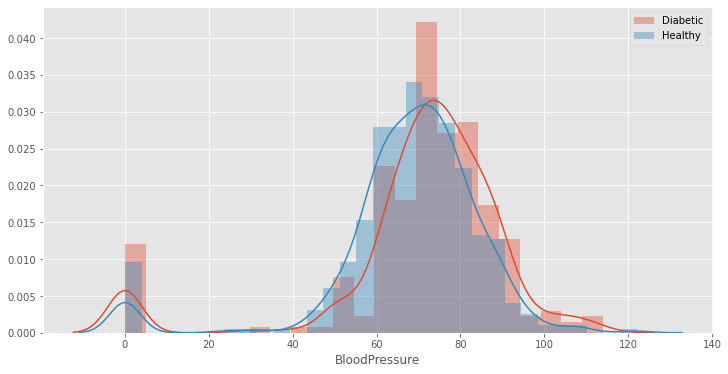

In [26]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['BloodPressure'], hist=True, label='Diabetic')
sns.distplot(Healthy['BloodPressure'], hist=True, label='Healthy')
plt.legend()

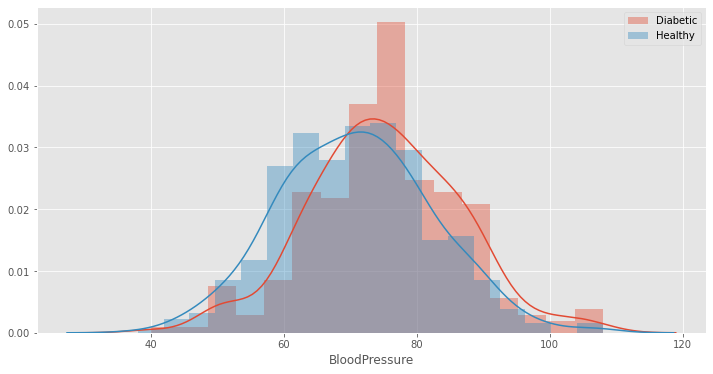

In [27]:
BP = z_score('BloodPressure', data)

Diabetic_BP = BP.loc[(BP['Outcome'] != 0)]
Healthy_BP = BP.loc[(BP['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_BP['BloodPressure'], hist=True, label='Diabetic')
sns.distplot(Healthy_BP ['BloodPressure'], hist=True, label='Healthy')
plt.legend()

In [28]:
fill_with_median('BloodPressure')

In [29]:
data.loc[(data['Outcome'] != 0) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 74.0
data.loc[(data['Outcome'] == 0) & (data['BloodPressure'].isnull()), 'BloodPressure'] = 70.0

## [3.4. BMI](http://)

* BMI : Body mass index (weight in kg/(height in m)^2)

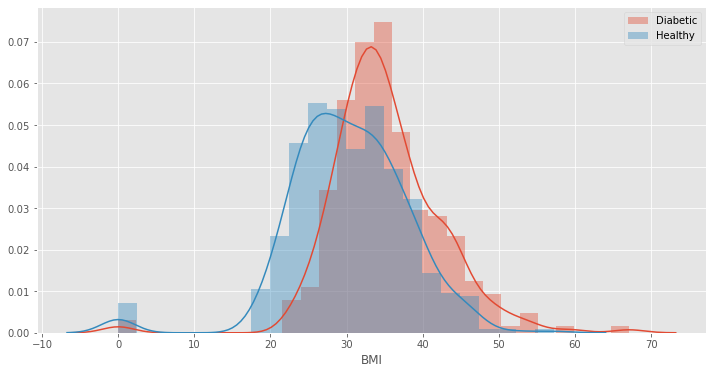

In [30]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['BMI'], hist=True, label='Diabetic')
sns.distplot(Healthy['BMI'], hist=True, label='Healthy')
plt.legend()

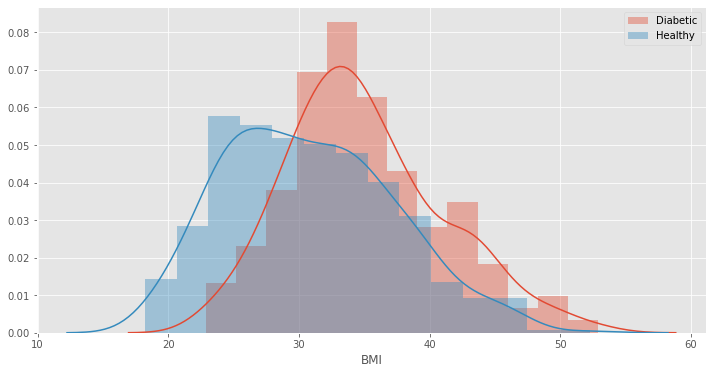

In [31]:
BMI = z_score('BMI', data)

Diabetic_BMI = BMI.loc[(BMI['Outcome'] != 0)]
Healthy_BMI = BMI.loc[(BMI['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_BMI['BMI'], hist=True, label='Diabetic')
sns.distplot(Healthy_BMI['BMI'], hist=True, label='Healthy')
plt.legend()

In [32]:
fill_with_median('BMI')

In [33]:
data.loc[(data['Outcome'] != 0) & (data['BMI'].isnull()), 'BMI'] = 34.2
data.loc[(data['Outcome'] == 0) & (data['BMI'].isnull()), 'BMI'] = 30.1

## [3.5. Glucose](http://)

* Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test

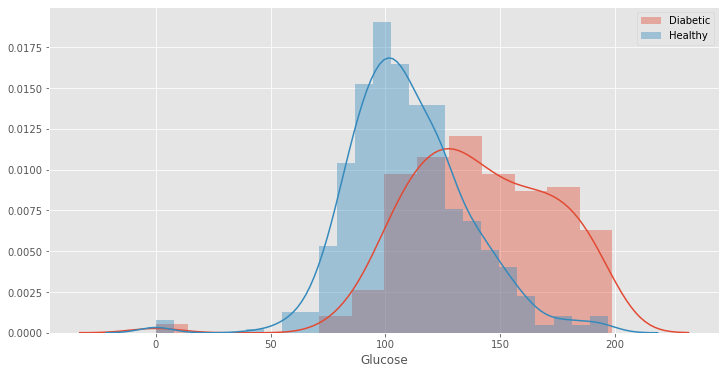

In [34]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['Glucose'], hist=True, label='Diabetic')
sns.distplot(Healthy['Glucose'], hist=True, label='Healthy')
plt.legend()

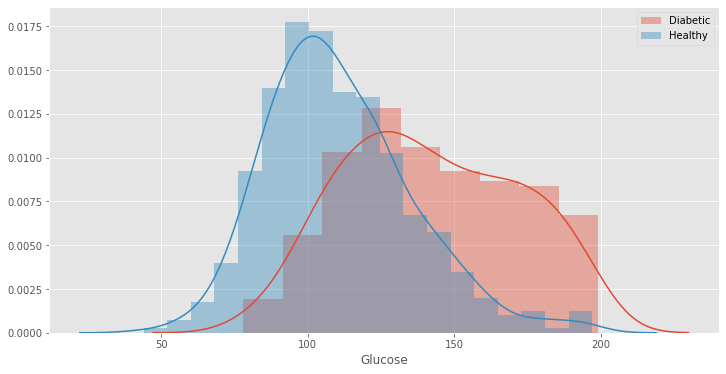

In [35]:
Glucose = z_score('Glucose', data)

Diabetic_glu = Glucose.loc[(Glucose['Outcome'] != 0)]
Healthy_glu = Glucose.loc[(Glucose['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_glu['Glucose'], hist=True, label='Diabetic')
sns.distplot(Healthy_glu['Glucose'], hist=True, label='Healthy')
plt.legend()

In [36]:
fill_with_median('Glucose')

In [37]:
data.loc[(data['Outcome'] != 0) & (data['Glucose'].isnull()), 'Glucose'] = 140.0
data.loc[(data['Outcome'] == 0) & (data['Glucose'].isnull()), 'Glucose'] = 107.0

## [3.6. Age](http://)

* Age : Age (years)

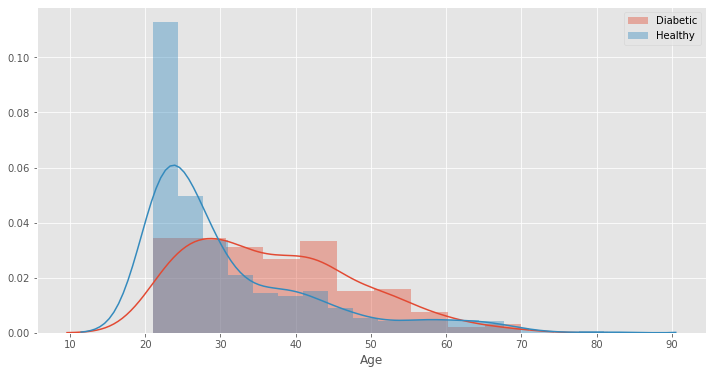

In [38]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['Age'], hist=True, label='Diabetic')
sns.distplot(Healthy['Age'], hist=True, label='Healthy')
plt.legend()

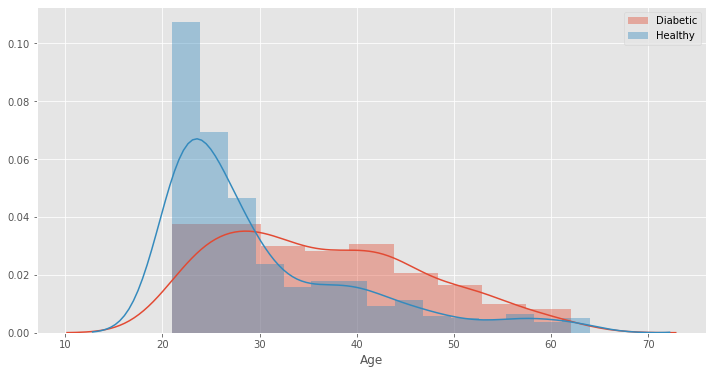

In [39]:
Age = z_score('Age', data)

Diabetic_age = Age.loc[(Age['Outcome'] != 0)]
Healthy_age = Age.loc[(Age['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_age['Age'], hist=True, label='Diabetic')
sns.distplot(Healthy_age['Age'], hist=True, label='Healthy')
plt.legend()

## [3.7. Pregnancies](http://)

* Pregnancies : Number of times pregnant

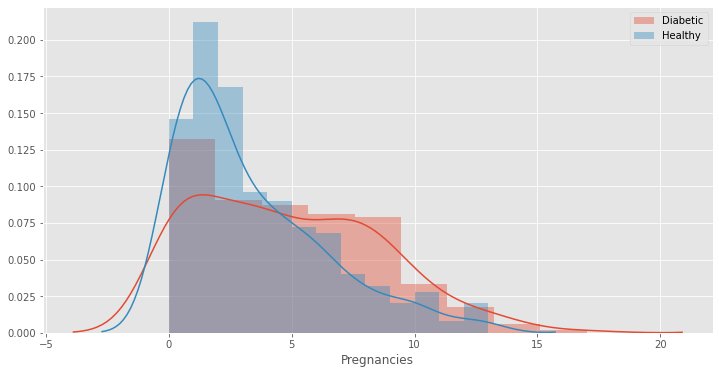

In [40]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['Pregnancies'], hist=True, label='Diabetic')
sns.distplot(Healthy['Pregnancies'], hist=True, label='Healthy')
plt.legend()

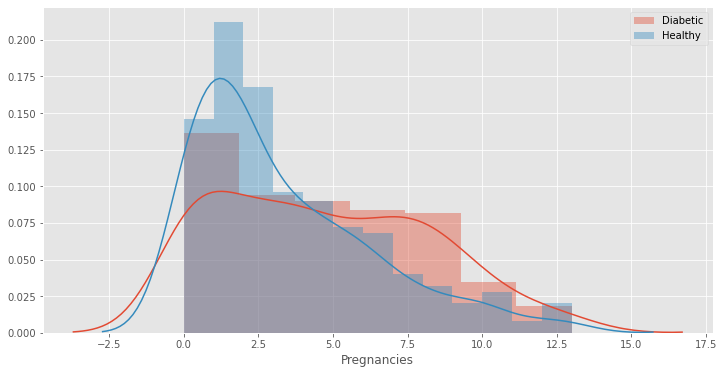

In [41]:
Preg = z_score('Pregnancies', data)

Diabetic_preg = Preg.loc[(Preg['Outcome'] != 0)]
Healthy_preg = Preg.loc[(Preg['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_preg['Pregnancies'], hist=True, label='Diabetic')
sns.distplot(Healthy_preg['Pregnancies'], hist=True, label='Healthy')
plt.legend()

## [3.8. DPF](http://)

* DiabetesPedigreeFunction : Diabetes pedigree function

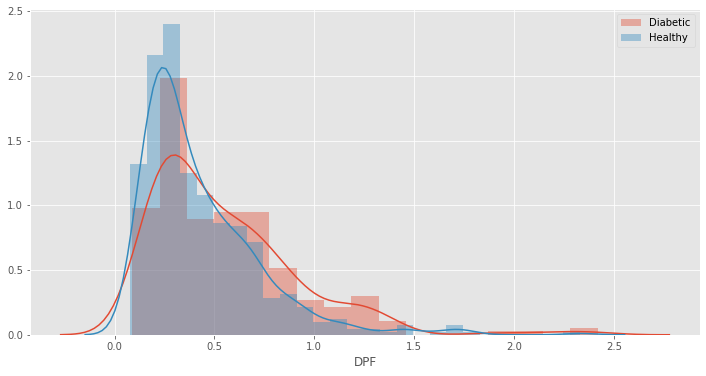

In [42]:
plt.figure(figsize=(12,6))
sns.distplot(Diabetic['DPF'], hist=True, label='Diabetic')
sns.distplot(Healthy['DPF'], hist=True, label='Healthy')
plt.legend()

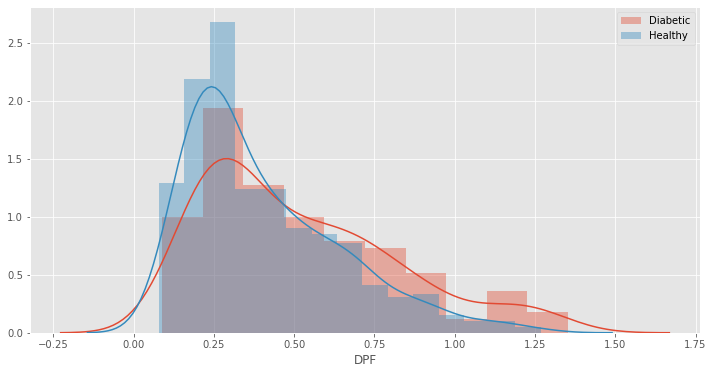

In [43]:
DPF = z_score('DPF', data)

Diabetic_DPF = DPF.loc[(DPF['Outcome'] != 0)]
Healthy_DPF = DPF.loc[(DPF['Outcome'] == 0)]

plt.figure(figsize=(12,6))
sns.distplot(Diabetic_DPF['DPF'], hist=True, label='Diabetic')
sns.distplot(Healthy_DPF['DPF'], hist=True, label='Healthy')
plt.legend()

**Preparing final outlier-free dataset.**

In [44]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
for col in cols:
    data = z_score(col, data)

In [45]:
data.shape

(692, 9)

*The reduced dataset shape tells us that some observations(Outliers) have been removed.*

# [4. Modelling](http://)

In [46]:
data['Outcome'].value_counts()

0    463
1    229
Name: Outcome, dtype: int64

*Before we dive into this section, we have to set a baseline accuracy, so that we can check whether our model is upto the mark or not. Now, we have two scenarios; either we set the accuracy according to Random-guessing or according to the Zero Classifier rule.*

1. Random guessing 
>In our case, the target split is 67% - 33% for class 0 and 1 respectively. Let's assume that I will guess randomly using this ratio. The theoritical accuracy of random guessing on a binary-classification problem is:

= P(class is 0)* P(guess is 0) + P(class is 1)* P(guess is 1)

=> 0.67* 0.67 + 0.33* 0.33 = 0.5578 or 56%

2. Zero Classifier rule
>This rule simply predicts majority class in your dataset. In the example above with a 67% - 33% for class 0 and 1, it would predict class 0 for every prediction and achieve an accuracy of 67%. This is 11% better than the theoritical maximum using random guessing.

This concludes two thhings:
* Never use random guessing as your baseline accuracy.
* In imbalanced classification problems, we should use metrics other than accuracy such as confusion matrix or ROC curve.

In [47]:
# Seperating data into features and label
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [48]:
# Scaling Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
0,0.461538,0.675325,0.485714,0.595745,0.437681,0.484277,0.452224,0.674419
1,0.076923,0.266234,0.400000,0.468085,0.246377,0.264151,0.224876,0.232558
2,0.615385,0.902597,0.371429,0.531915,0.437681,0.160377,0.489292,0.255814
3,0.076923,0.292208,0.400000,0.340426,0.228986,0.311321,0.073311,0.000000
4,0.384615,0.467532,0.514286,0.425532,0.246377,0.232704,0.101318,0.209302


## [4.1. Splitting data into train and test set](http://)

In [49]:
# Fixing the random_state in order to maintain consistency in results
rand_state = 11

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state=rand_state, test_size=0.2, stratify=y)
X_train.shape, X_test.shape

((553, 8), (139, 8))

## [4.2. Base models](http://)

### 4.2.1. Decision Tree Classifier

In [50]:
DTC = DecisionTreeClassifier(random_state=rand_state)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

### 4.2.2. AdaBoost Classifier

In [51]:
ABC = AdaBoostClassifier(DecisionTreeClassifier(random_state=rand_state),random_state=rand_state,learning_rate=0.1)
ABC.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=11),
                   learning_rate=0.1, random_state=11)

### 4.2.3. XGBoost Classifier

In [52]:
XGBC = xgb.XGBClassifier(learning_rate=0.05,random_state =rand_state)
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=11,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### 4.2.4. LightGBM Classifier

In [53]:
LGBMC = lgbm.LGBMClassifier(learning_rate=0.05)
LGBMC.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.05)

### 4.2.5. Random Forest Classifier

In [54]:
RFC = RandomForestClassifier(random_state=rand_state)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

### 4.2.6. k-NN Classifier

In [55]:
KNNC = KNeighborsClassifier(n_neighbors=7)
KNNC.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### 4.2.7. Logistic Regression

In [56]:
LR = LogisticRegression(random_state=rand_state, class_weight={0:0.33, 1:0.67})
LR.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.33, 1: 0.67}, random_state=11)

In [57]:
probabilities = LR.predict_proba(X_test)
print(probabilities[:15,:])

[[0.48957294 0.51042706]
 [0.4421301  0.5578699 ]
 [0.73661194 0.26338806]
 [0.59520391 0.40479609]
 [0.07149321 0.92850679]
 [0.94292392 0.05707608]
 [0.85942935 0.14057065]
 [0.8042058  0.1957942 ]
 [0.22093702 0.77906298]
 [0.35276245 0.64723755]
 [0.32882934 0.67117066]
 [0.61892991 0.38107009]
 [0.78467756 0.21532244]
 [0.63599463 0.36400537]
 [0.8255279  0.1744721 ]]


## [4.3. Evaluation Metrics](http://)

In [58]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:, 1]])
scores = score_model(probabilities, 0.5)
print((scores[: 15]))
print(y_test[: 15])

[1 1 0 0 1 0 0 0 1 1 1 0 0 0 0]
269    1
44     0
122    0
250    0
662    1
68     0
183    0
601    0
237    1
592    1
293    1
460    0
483    0
138    0
253    0
Name: Outcome, dtype: int64


### 4.3.1. Confusion matrix

In [59]:
def print_metrics(labels, scores):
    metrics = precision_recall_fscore_support(labels, scores)
    conf = confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive        76                17
Actual negative        10                36

Accuracy  0.81
 
           Positive      Negative
Num case       93            46
Precision    0.88          0.68
Recall       0.82          0.78
F1           0.85          0.73


*In order to understand what confusion matrix is, let's take an example:*    
    
    There are a group of people waiting to examine if they have swine flu. The doctor goes through all the cases and tells the patient if they have the flu or no.

Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

![](https://cdn-images-1.medium.com/max/1600/0*9r99oJ2PTRi4gYF_.jpg)

* Accuracy = (True Positives + True Negatives)/(True Positives + False Positives + False Negatives + True Negatives)

* Specificity/ True Negative Rate/ Precision = True Negatives/(True Negatives + False Positives)

* Sensitivity/ True Positive Rate/ Recall = True Positives/(True Positives + False Negatives)

* F_1 score = 2/((1/Precision) + (1/Recall))

### 4.3.2. ROC-AUC curve

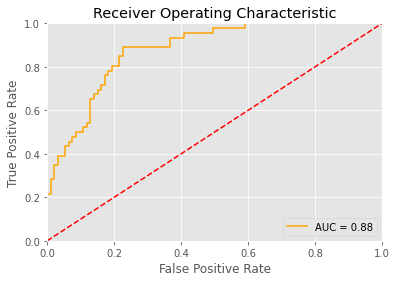

In [60]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)    

*The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.*

* The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

### 4.3.3. Accuracy

In [61]:
# K-Fold Cross Validation function
n_folds = 5

def scores_cv(model):
    kf = StratifiedKFold(n_folds, shuffle=True, random_state=rand_state).get_n_splits(data.values)
    scores = cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    return(scores)

*I have made a cross-validation function to test the models based on accuracy on validation data.*

* Decision Tree Classifier

In [62]:
scores = scores_cv(DTC)
print("\nDecision Tree score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Decision Tree score: 0.8553 (0.0174)



*  AdaBoost Classifier

In [63]:
scores = scores_cv(ABC)
print("\nAda Boost score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Ada Boost score: 0.8535 (0.0180)



* 4.3.3.1. XGBoost Classifier

In [64]:
scores = scores_cv(XGBC)
print("\nXG Boost score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


XG Boost score: 0.8952 (0.0154)



* LightGBM Classifier

In [65]:
scores = scores_cv(LGBMC)
print("\nLightGBM score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


LightGBM score: 0.8952 (0.0232)



* Random Forest Classifier

In [66]:
scores = scores_cv(RFC)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Random Forest score: 0.8879 (0.0166)



* k-NN Classifier

In [67]:
scores = scores_cv(KNNC)
print("\nKNN score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


KNN score: 0.8281 (0.0405)



* Logistic Regression

In [68]:
scores = scores_cv(LR)
print("\nLogistic Regression score: {:.4f} ({:.4f})\n".format(scores.mean(), scores.std()))


Logistic Regression score: 0.7885 (0.0322)



## [4.4. Hyperparamter tuning](http://)

**I have chosen the best performing models from the above 7 to be optimized in order to achieve maximum accuracy.**

**One of the main theoretical backings to motivate the use of random search in place of grid search is the fact that for most cases, hyperparameters are not equally important and the grid search strategy spends redundant time exploring the unimportant parameter. and misses the optimal model.**

*A Gaussian process analysis of the function from hyper-parameters to validation set performance reveals that for most data sets only a few of the hyper-parameters really matter, but that different hyper-parameters are important on different data sets. This phenomenon makes grid search a poor choice for configuring algorithms for new data sets. - Bergstra, 2012*

* XGBoost Classifier

In [69]:
param_dist = {'colsample_bytree': nr.random(1), "learning_rate": [0.05, 0.01, 0.1, 0.3]
              , "max_depth": randint(1,20), "min_child_weight": nr.random(5)
              , "n_estimators": [100, 300, 500]
              , "subsample":nr.random(1)}

XGBC = xgb.XGBClassifier(random_state=rand_state)
XGBC_cv = RandomizedSearchCV(XGBC,param_distributions=param_dist, cv=5)
XGBC_cv.fit(X_train, y_train)

print("Tuned XGBoost Parameters: {}".format(XGBC_cv.best_params_)) 
print("Best score is {}".format(XGBC_cv.best_score_)) 

Tuned XGBoost Parameters: {'colsample_bytree': 0.04189226463825302, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 0.8811848634280851, 'n_estimators': 500, 'subsample': 0.12893684886385293}
Best score is 0.8914987714987713


* LightGBM Classifier

In [70]:
param_dist = {'num_leaves': randint(1,20), 'max_depth': randint(1,15), 'learning_rate': [0.05, 0.1, 0.3]
              , 'n_estimators': [100, 300, 500], 'min_child_weight': nr.random(5), 'min_child_samples': randint(1,20)
              , 'subsample': nr.random(1), 'colsample_bytree': nr.random(1)}

LightGBM = lgbm.LGBMClassifier(random_state=rand_state)
LightGBM_cv = RandomizedSearchCV(LightGBM,param_distributions=param_dist, cv=5)
LightGBM_cv.fit(X_train, y_train)

print("Tuned LightGBM Parameters: {}".format(LightGBM_cv.best_params_)) 
print("Best score is {}".format(LightGBM_cv.best_score_))

Tuned LightGBM Parameters: {'colsample_bytree': 0.836535766265586, 'learning_rate': 0.1, 'max_depth': 11, 'min_child_samples': 3, 'min_child_weight': 0.12507595733715826, 'n_estimators': 100, 'num_leaves': 6, 'subsample': 0.55988735274056}
Best score is 0.9023751023751023


* Random Forest Classifier

In [71]:
param_dist = {'n_estimators': [100,200,300,400,500,600], 'criterion': ['gini','entropy']
              , 'max_depth': randint(1,15), 'max_features': randint(1,9), 'min_samples_leaf': randint(1,9)}

RFC = RandomForestClassifier(random_state=rand_state)
RFC_cv = RandomizedSearchCV(RFC,param_distributions=param_dist, cv=5)
RFC_cv.fit(X_train, y_train)

print("Tuned Random Forest Tree Parameters: {}".format(RFC_cv.best_params_)) 
print("Best score is {}".format(RFC_cv.best_score_)) 

Tuned Random Forest Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 100}
Best score is 0.8933169533169535


# [5. Final prediction](http://)

**Filling the tuned paramters into the respective models.**

In [72]:
XGBC_best = xgb.XGBClassifier(random_state=rand_state, colsample_bytree=0.9250812043886706,
                             learning_rate=0.01, max_depth=19, min_child_weight=0.9458610813134812,
                             n_estimators=300, subsample=0.8977705383997567)

LightGBM_best = lgbm.LGBMClassifier(random_state=rand_state, colsample_bytree=0.2991633157558994,
                               learning_rate=0.3, max_depth=8,min_child_samples=16,
                               min_child_weight=0.8711407655443546, n_estimators=100,
                               num_leaves=4, subsample=0.3627412195264993)

RFC_best = RandomForestClassifier(random_state=rand_state, criterion='entropy', max_depth=4,
                                  max_features=3, min_samples_leaf=1, n_estimators=500)

* VotingClassifier : It is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting

In [73]:
voting = VotingClassifier(estimators=[('RFC', RFC_best), ('LightGBM', LightGBM_best),
('XGBC', XGBC_best)], voting='soft', n_jobs=4)

voting.fit(X_train, y_train)

score = voting.predict(X_test)
print((score[: 15]))
print(np.array(y_test[: 15]))

[1 0 0 0 1 0 0 0 1 1 0 0 0 0 0]
[1 0 0 0 1 0 0 0 1 1 1 0 0 0 0]
